- Kaggle에서 데이터 분석 입문자를 위한 튜터리얼
- Titanic- Machine learning from Disaster

<img src='https://mintaewon.github.io/images/Titanic/titanic.jpg'>

## 배경지식

RMS 타이타닉호는 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 타이타닉호의 침몰로 1,514명이 사망하였다.

## 목표

생존유무가 포함된 탑승객의 학습 데이터 정보를 분석하고 그 정보를 바탕으로 기계학습을 진행하여 테스트 데이터의 탑승객 생존유무를 예측

## Data Dictionary

- Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
- Name - 탑승객 성명
- Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex - 성별
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Embarked - 탑승 항구
- Fare - 탑승 요금
- Ticket - 티켓 넘버
- Cabin - 객실 넘버

## 데이터 셋: kaggle titanic(https://www.kaggle.com/c/titanic)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls -1ha /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [3]:
!mkdir -p ~/.kaggle # making dictory
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ #!mv(move)
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                                                                     deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2024                                      2024-11-10 23:59:00  Featured         1,100,000 Usd        745           False  
https://www.kaggle.com/competitions/isic-2024-challenge                                 2024-09-06 23:59:00  Research            80,000 Usd       2251           False  
https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification  2024-10-08 23:59:00  Featured            50,000 Usd       1061           False  
https://www.kaggle.com/competitions/ariel-data-challenge-2024                           2024-10-31 23:59:00  Featured            50,000 Usd        244     

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 33.8MB/s]


In [5]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

# 탐색적 자료 분석(Exploratory Data Analysis(EDA)


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


In [7]:
train.head() #default = 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print(train.shape,test.shape)

(891, 12) (418, 11)


- 결측치 확인

In [11]:
train.isnull().sum()
# # train.isna().sum()
# train.isnull().sum().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- Age, Cabin, Embarked 에 결측치가 있는 것을 확인할 수 있습니다.
    - 특히 Cabin의 결측치가 상당히 많이 존재합니다. Feature로 사용하기에는 불가능 할 것 같습니다.
- PassengerId는 승객의 번호이므로 생존유무와 연광성이 없어보입니다.

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 문제? 연속형? 범주형

-> 범주형에 대한 feature에 대한 막대차트

1. Pclass
2. sex
3. sibsp
4. parch
5. embarked
6.cabin


In [14]:
train['Survived'] ==1

,Survived
0,False
1,True
2,True
3,True
4,False
...,...
886,False
887,True
888,False
889,True


In [15]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
train[train['Survived']==1]['Sex']

,Sex
1,female
2,female
3,female
8,female
9,female
...,...
875,female
879,female
880,female
887,female


In [17]:
train[train['Survived']==1]['Sex'].value_counts()

,count
Sex,
female,233
male,109


In [18]:
train[train['Survived'] ==1]['Sex'] # train['Survived'] ==1 ->True,False ->train[Trus,False]['Sex']->0->femele,1->male

,Sex
1,female
2,female
3,female
8,female
9,female
...,...
875,female
879,female
880,female
887,female


In [19]:
train['Sex']=='Female'

,Sex
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [20]:
def bar_chart(feature):
  survived = train[train['Survived'] ==1][feature].value_counts() # 생존자를 카운트
  dead = train[train['Survived'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) #[생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

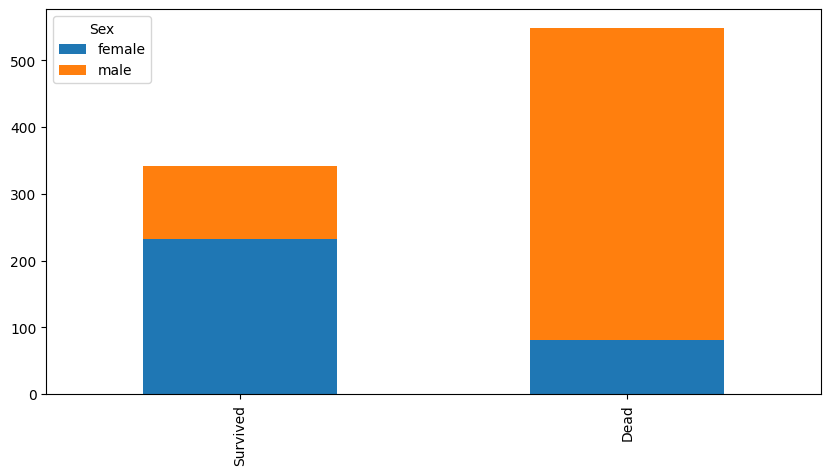

In [21]:
bar_chart('Sex') #무슨 이유로 남성분들이 사망을 하셨을까?

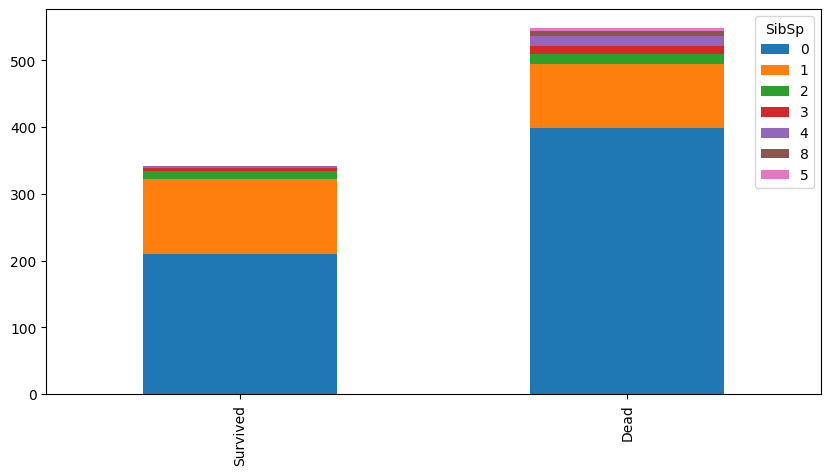

In [22]:
bar_chart('SibSp') # 함께 탑승한 형제 또는 배우자 수 에 따라서 생존이 왜 다르지?

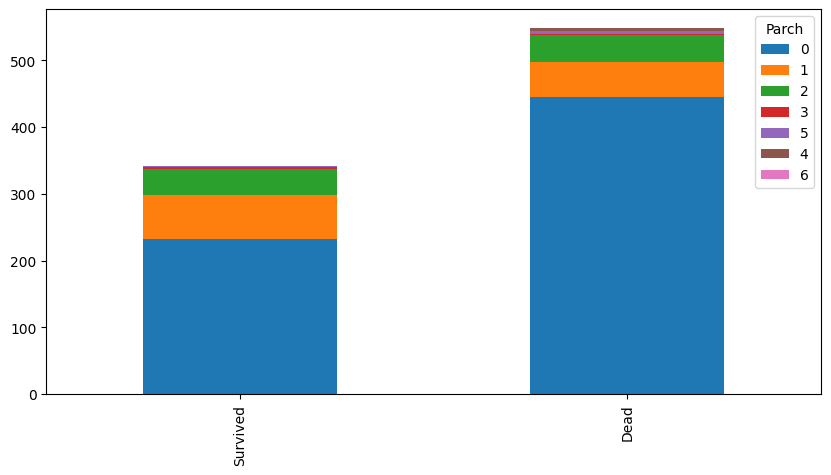

In [23]:
bar_chart('Parch')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

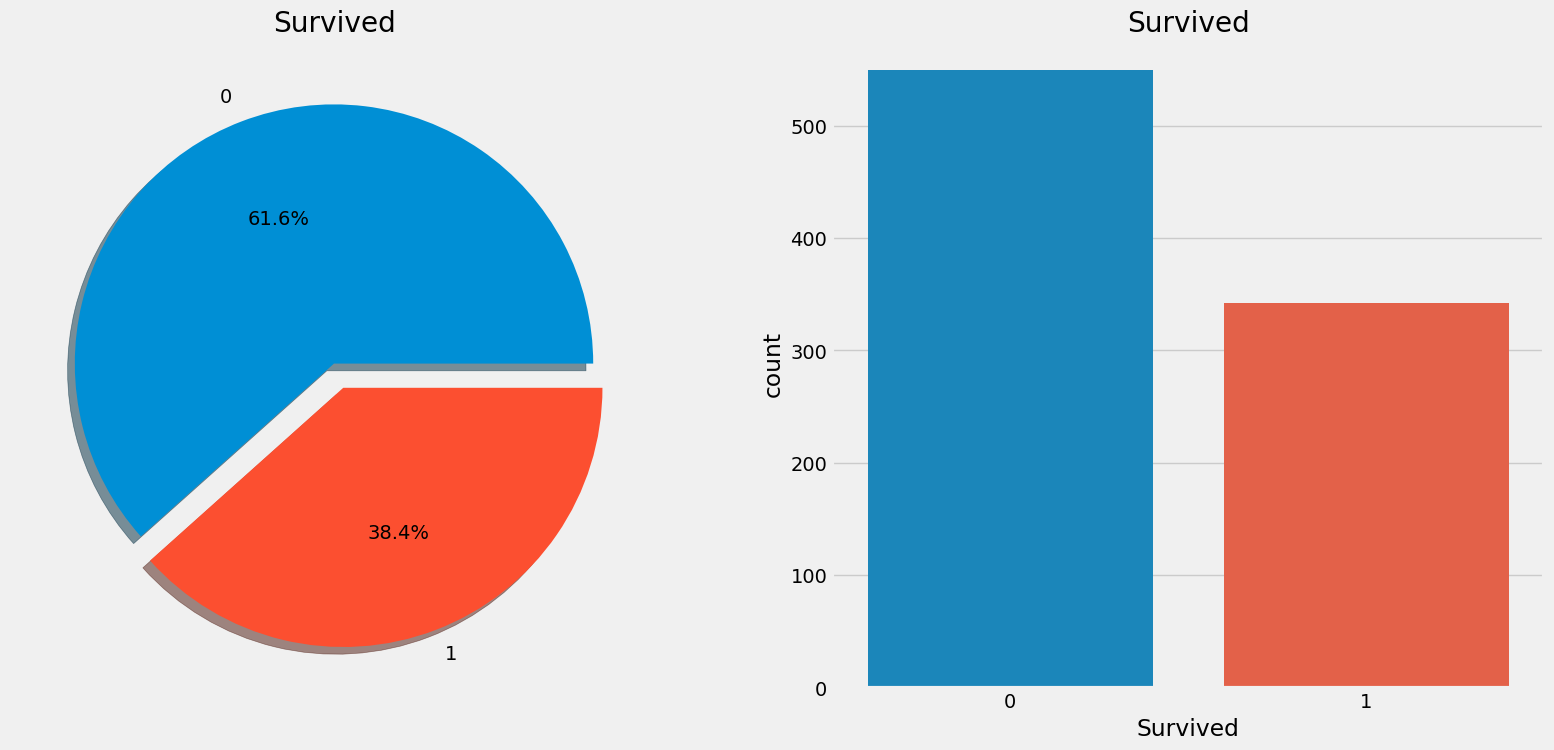

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax = ax[0], shadow=True)
#explode : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄.
#autopct : 각 항목의 퍼센트를 표시함.
#shadow : 그림자를 그릴 것인지?
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=train['Survived'],ax=ax[1])
ax[1].set_title('Survived')
plt.show()


- Pcalss

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


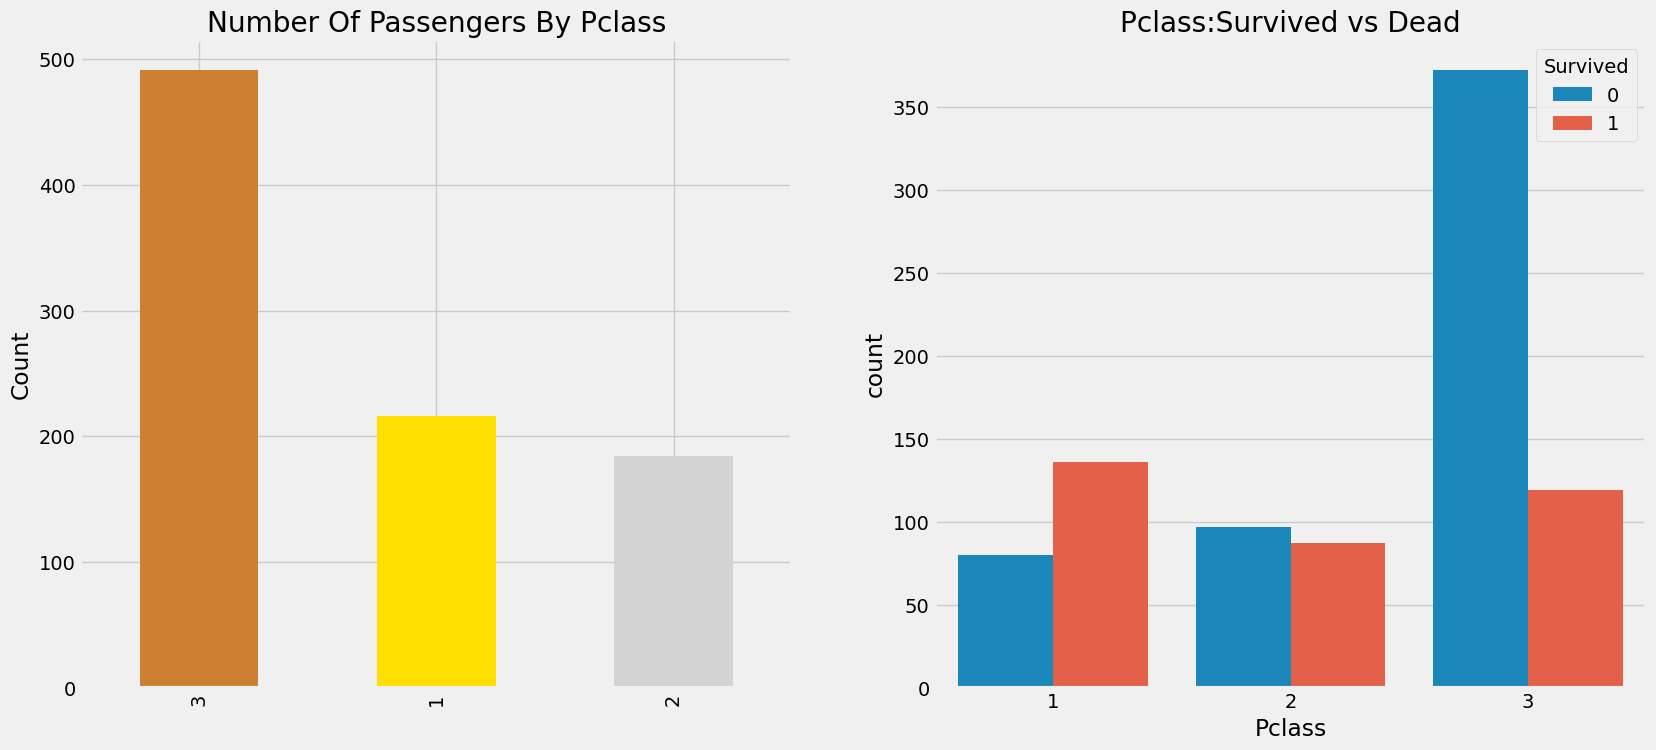

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

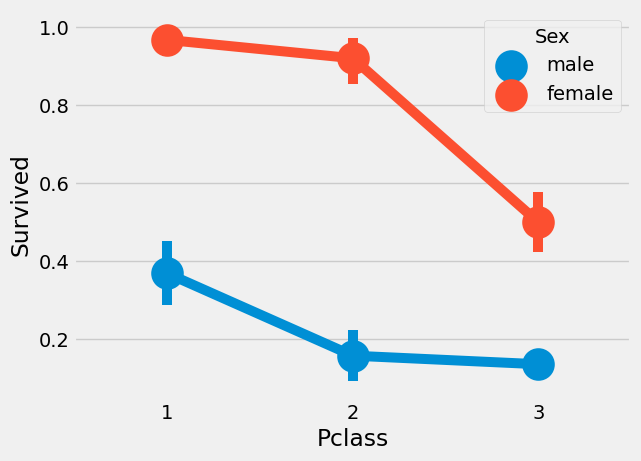

In [ ]:
sns.pointplot(x = 'Pclass',y = 'Survived',hue='Sex',data=train)
plt.show()

In [ ]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


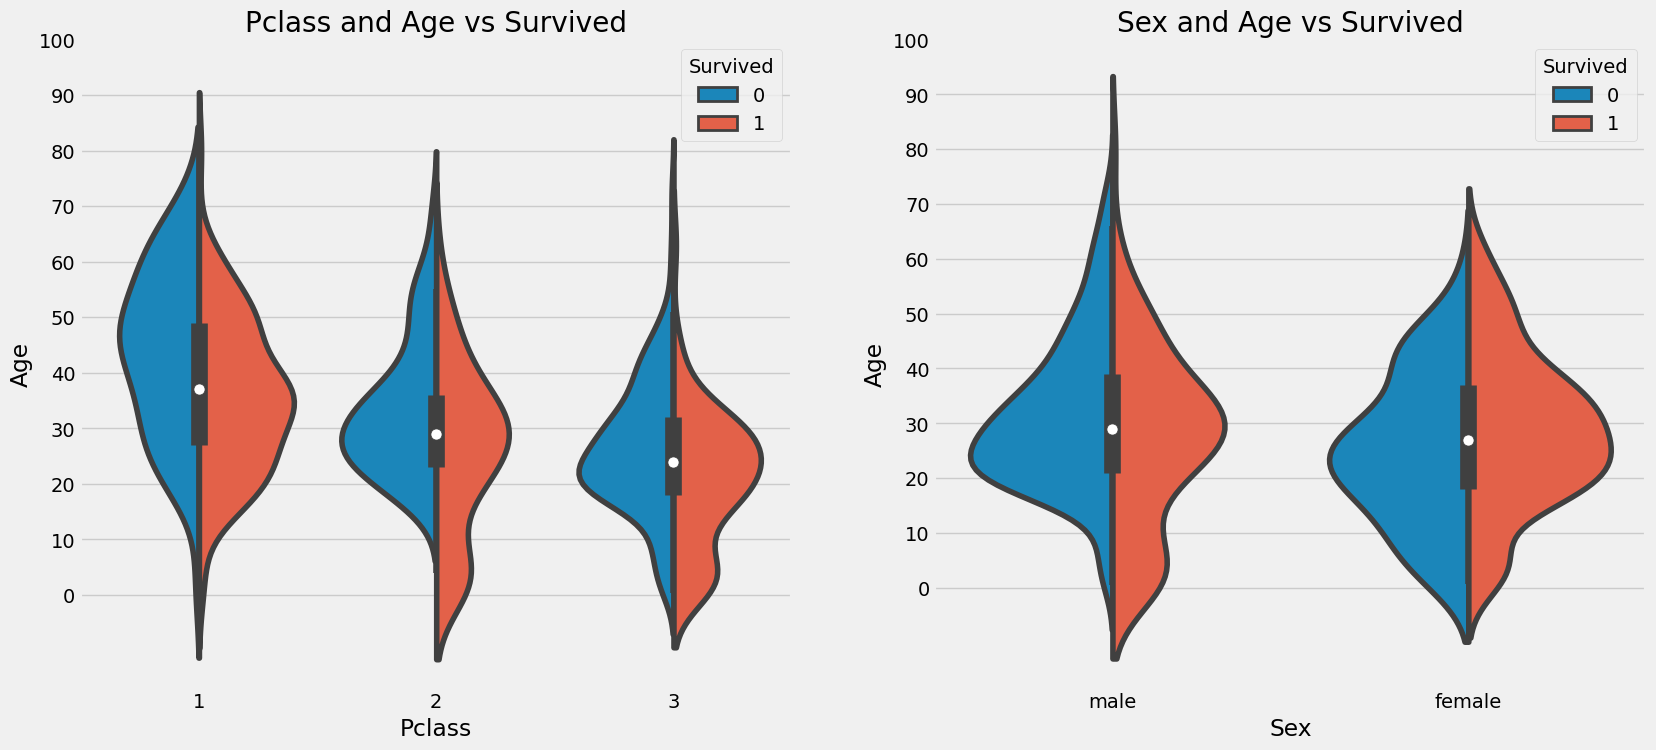

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y="Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Name'].str

In [ ]:
train['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.', expand = False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
train_test_data = [train,test]
# Name에 따라서 뭐가 다른가? ->전에 각각 해당하는 value를 count를 함.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand = False)
#extract('([A-Za-z]+)\. ->정규표현식
# A-Z와 a-Z를 찾아서 어느지점에서 끝내는가? .을 기준으로 해서 자르라는 이야기 그 다음에 count

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- expand 설명

In [ ]:
import pandas as pd
import numpy as np

s2 = pd.Series(['a_b_c','c_d_e',np.nan,'f_g_h'],dtype='string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [ ]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- 방금 저장된 리스트 중에서 몇번쨰를 추출할 것인지를 정하려면, get 또는 []를 사용해서 지정할 수 있다. get()이나 []이나 결과는 같음.

In [ ]:
s2.str.split('_').str.get(1)

0       b
1       d
2    <NA>
3       g
dtype: object

In [ ]:
s2.str.split('_').str[1]

0       b
1       d
2    <NA>
3       g
dtype: object

- expand를 사용하면 DataFrame으로 쉽게 확장해서 반환이 가능합니다.

In [ ]:
s2.str.split('_',expand = True) #데이터프레임 형식으로 확장되었음.

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [ ]:
s2.str.split('_',expand = False)

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- 원본 Series에 StringDtype이 있으면 출력 열도 모두 StringDtype이 됨.
- n에 원하는 갯수를 입력하여 분할하고자 하는 수를 제한할 수도 있다.

In [ ]:
s2.str.split('_',expand=True,n=1)

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


In [ ]:
s2.str.split('_',expand=True,n=2)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


- rsplit은 문자열의 끝에서 문자열의 시작까지 반대 방향으로 작동한다는 점을 제외하면 split과 비슷하다.

In [ ]:
s2.str.rsplit('_', expand=True,n=1)

,0,1
0,a_b,c
1,c_d,e
2,<NA>,<NA>
3,f_g,h


In [ ]:
s2.str.rsplit('_', expand=True,n=2)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


- replace 함수를 사용해서 정규식을 대체할 수 있음.


In [ ]:
s3 = pd.Series(['A','B','C','Aaba','Baca','',np.nan,'CABA','dog','cat'], dtype='string')
s3

0       A
1       B
2       C
3    Aaba
4    Baca
5        
6    <NA>
7    CABA
8     dog
9     cat
dtype: string

- replace 함수를 활용해서 '^.a|dog'에 해당하는 문자 영역을 'XX-XX'로 바꿔줄 수가 있다.

In [ ]:
s3.str.replace('^.a|dog','XX-XX',case=False)

0          A
1          B
2          C
3    XX-XXba
4    XX-XXca
5           
6       <NA>
7    XX-XXBA
8      XX-XX
9     XX-XXt
dtype: string

In [ ]:
s3.str.replace('^a|dog','XX-XX',case=False)

0       XX-XX
1           B
2           C
3    XX-XXaba
4        Baca
5            
6        <NA>
7        CABA
8       XX-XX
9         cat
dtype: string

- 정규식을 적용하려면, 약간의 주의점이 필요함.
- '$'의 정규표현식 의미로 인해 이슈가 발생하기도 함.

In [ ]:
dollars = pd.Series(['12','-$10','$10,000'],dtype='string')
dollars

0         12
1       -$10
2    $10,000
dtype: string

- 단순하게 '$'를 공백으로 변경하는 코드를 실행해본다.

In [ ]:
dollars.str.replace('$','')

0        12
1       -10
2    10,000
dtype: string

- '$'가 사라짐.
    - 하지만, '-$'문자까지 추가해서 변경을 해보자!

In [ ]:
dollars.str.replace('-$','')

0         12
1       -$10
2    $10,000
dtype: string

- 변경되지 않고 그대로 있다.
    - 1개 이상의 패턴인 경우에는 특수문자를 피해야 함.
    - 위의 방식을 정규표현식으로 바꿔서 표현을 해보면,

In [ ]:
dollars.str.replace(r'-\$','-')

0         12
1        -10
2    $10,000
dtype: string

- 문자열을 문자 그대로 대체하려면(str.replace()와 동일) 각 문자를 벗어나게 하지 않고 옵션인 regex 파라미터를 False로 설정해야 함.

In [ ]:
dollars.str.replace(r'-\$','-',regex = False)

0         12
1       -$10
2    $10,000
dtype: string

# one-hot encoding을 합니다.

In [ ]:
# 극단적으로 나눔.
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping) #모든 피쳐에 적용해주세요!

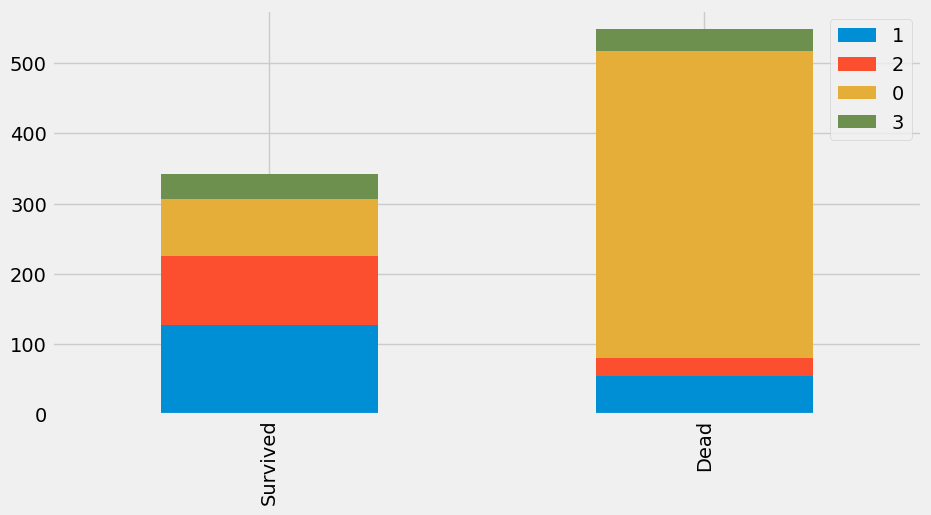

In [ ]:
bar_chart('Title')

In [ ]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
# method : from sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

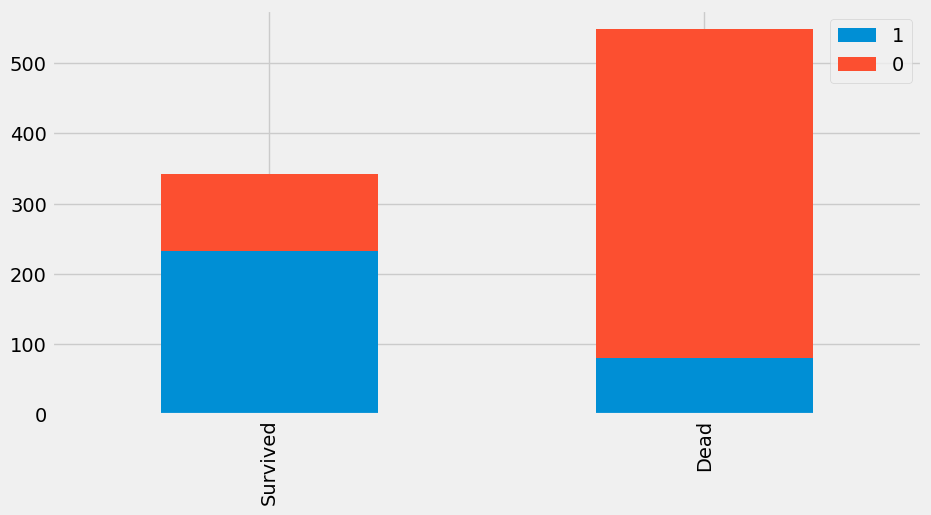

In [ ]:
bar_chart('Sex')

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
train.groupby('Title')['Age'].head()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
14     14.0
15     55.0
16      2.0
22     15.0
30     40.0
50      7.0
59     11.0
63      4.0
149    42.0
150    51.0
245    44.0
249    54.0
317    54.0
369    24.0
398    23.0
443    28.0
449    52.0
536    45.0
556    48.0
599    49.0
626    57.0
632    32.0
641    24.0
647    56.0
660    50.0
694    60.0
710    24.0
745    70.0
759    33.0
822    38.0
848    28.0
Name: Age, dtype: float64

In [ ]:
#missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace 는 채울꺼냐?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace = True)

test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace = True)

In [ ]:
train['Age'].isna().sum()

0

In [ ]:
train[['Title','Age']].groupby(['Title'],as_index = False).mean()

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.642857
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.466750
9,Miss,21.620879


In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- 가설 2) 사망자의 나이가 어떻게 될까? +생존자

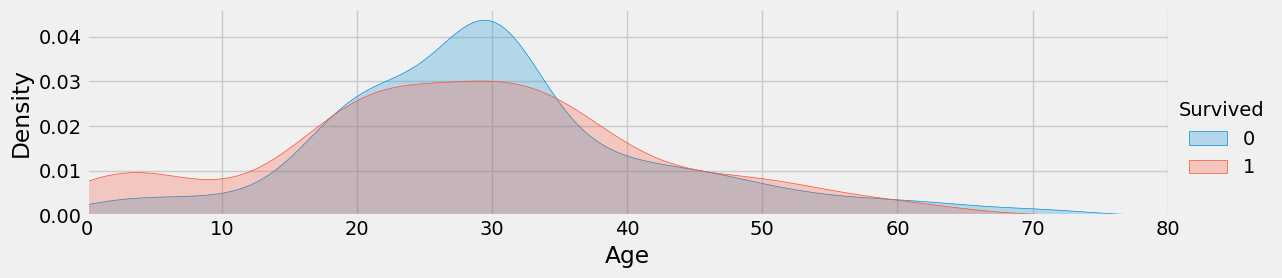

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때 유용함
# FeactGrid는 Colum,row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
#aspect : subplot의 세로 대비 가로의 비율.
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()
#20-30대에 사망률 > 생존률이 높다 왜 그럴까?

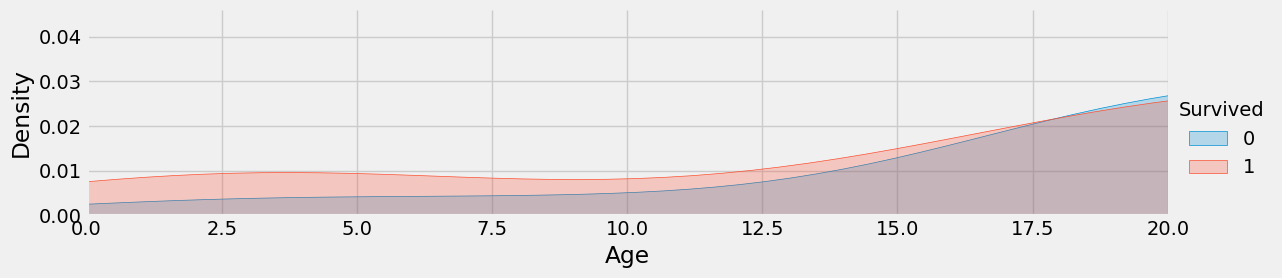

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

plt.show()
#0-20까지 나이로 자름.

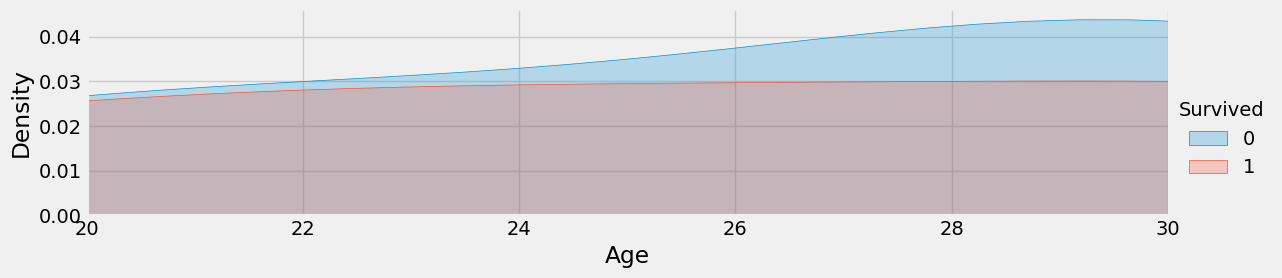

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30)

plt.show()
#20-30으로 나이를 자름.

0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)

잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <=16, 'Age']=0,
  dataset.loc[ ((dataset['Age'] >16) and  (dataset['Age'] <=26)),'Age']=1

ValueError: ignored

#컴마로 연결을 해버리니깐, multi index로 받아들여서 동시에 처리가 안됨

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [ ]:
train2= train.copy()
train2.loc[(train2.Age<=16),"Age_bin"]=0
train2.loc[(train2.Age>16) & (train2.Age<=26),"Age_bin"]=1
train2.loc[(train2.Age>26) & (train2.Age<=36),"Age_bin"]=2
train2.loc[(train2.Age>36) & (train2.Age<=46),"Age_bin"]=3
train2.loc[(train2.Age>46),"Age_bin"]=4
train2

Test2= train.copy()
Test2.loc[(train2.Age<=16),"Age_bin"]=0
Test2.loc[(train2.Age>16) & (train2.Age<=26),"Age_bin"]=1
Test2.loc[(train2.Age>26) & (train2.Age<=36),"Age_bin"]=2
Test2.loc[(train2.Age>36) & (train2.Age<=46),"Age_bin"]=3
Test2.loc[(train2.Age>46),"Age_bin"]=4
Test2


TypeError: ignored

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,Mr


In [ ]:
def bar_chart2(feature):
  survived = train[train['Survived'] ==1][feature].value_counts() # 생존자를 카운트
  dead = train[train['Survived'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) #[생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

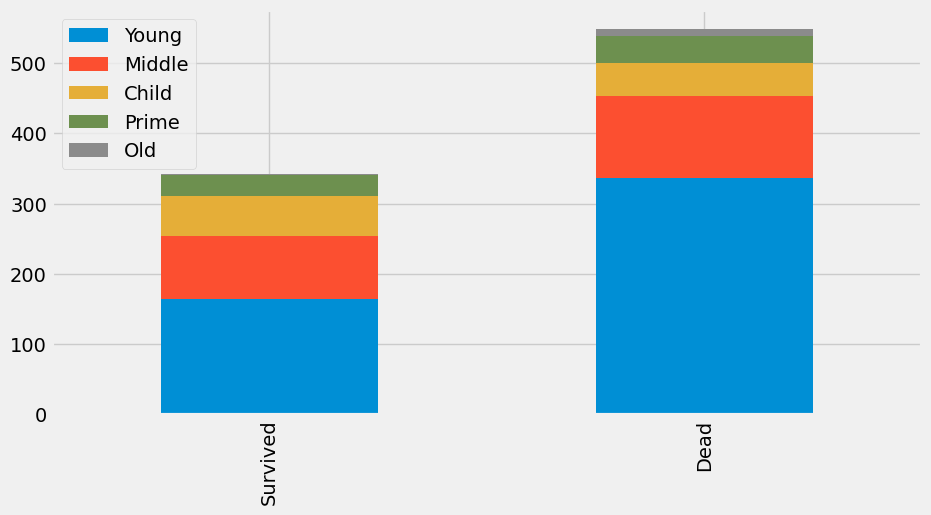

In [ ]:
bar_chart2('Age')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,Mr


#Embarked

In [ ]:
train2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

# FamilySize
함께 동승한 부모님과 아리들의 수화 형제와 배우자의 수

혼자탄거랑 가족들이랑 탄건랑 어떻게 다른지?

Sibsp+parch

In [ ]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1
#솔로일 가능성이 있기 때문에 1을 더해줌. 왜냐하면 파이썬은 0부터 숫자를 세기 때문에

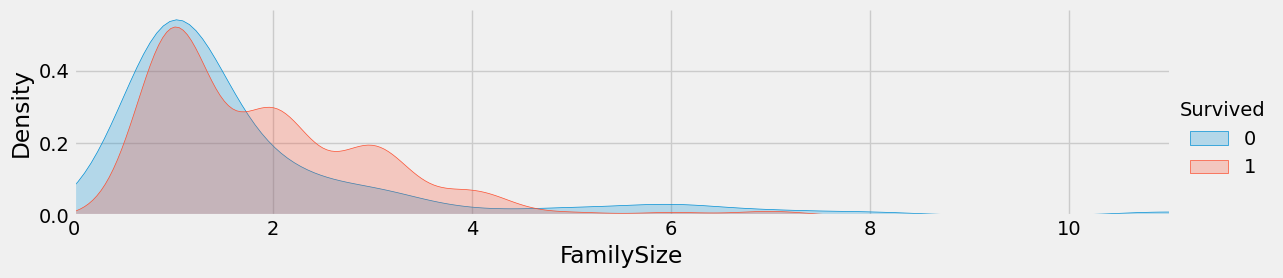

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

# 혼자일경우는 사망률,생존률이 높음

In [ ]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis = 1).copy()

In [ ]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,Mrs,2
4,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,Rare,1
887,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,Miss,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,Mr,1


In [ ]:
X_test['Fare'].fillna(0,inplace = True)
X_test['Title'].fillna(0,inplace = True)
#Test에 대해서도 결측치가 있자만 강제로 0을 할당.

In [ ]:
X_test.isna().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Name',axis = 1, inplace = True)
X_test.drop('Name',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Ticket',axis = 1, inplace = True)
X_test.drop('Ticket',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Cabin',axis = 1, inplace = True)
X_test.drop('Cabin',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Embarked',axis = 1, inplace = True)
X_test.drop('Embarked',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Age',axis = 1, inplace = True)
X_test.drop('Age',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Title',axis = 1, inplace = True)
X_test.drop('Title',axis = 1, inplace = True)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LinearRegression
# 데이터가 정렬되어있을 경우도 있기 때문에 데이터를 shuffle 해줌
from sklearn.utils import shuffle


lig_reg = LinearRegression()
lig_reg.fit(X_train,Y_train)

lig_reg.score(X_train,Y_train)


In [ ]:
Y_pred = lig_reg.predict(X_test)

In [ ]:
df1 = pd.DataFrame(Y_pred)
df1

In [ ]:
# import pandas as pt
# df1.to_csv('test1.csv')